In [20]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from adjustText import adjust_text
# Load the data from the Excel file
file_path = './Maldives_Island-Level-Indicator-Sheet-Population_clean.xlsx'
data = pd.read_excel(file_path)



# calculate density  by deviding population by area
data['Density'] = data['Population'] / data['Area']
print(data.head(n=100))

   Atoll       Locality              Name  Population    Growth      Area  \
0     HA         Baarah         HA.Baarah        1141 -1.350705  2.499552   
1     HA      Dhidhdhoo      HA.Dhidhdhoo        3412  2.243495  0.965429   
2     HA      Filladhoo      HA.Filladhoo         559 -0.757364  2.660428   
3     HA     Hoarafushi     HA.Hoarafushi        1841 -0.533292  0.690224   
4     HA     Ihavandhoo     HA.Ihavandhoo        2873  1.155364  0.625757   
..   ...            ...               ...         ...       ...       ...   
95    AA  Bodufolhudhoo  AA.Bodufolhudhoo         704  1.397699  0.124927   
96    AA       Feridhoo       AA.Feridhoo         544  2.190627  0.450798   
97    AA      Himandhoo      AA.Himandhoo         885  1.553225  0.209590   
98    AA        Maalhos        AA.Maalhos         516  0.628157  0.324533   
99    AA      Mathiveri      AA.Mathiveri         878  2.940570  0.230643   

    Median      Density  
0     29.0   456.481876  
1     30.0  3534.180581

In [21]:
# unique atolls
atolls = data['Atoll'].unique()
atolls

array(['HA', 'HDh', 'Sh', 'N', 'R', 'B', 'Lh', 'K', 'AA', 'Adh', 'V', 'M',
       'F', 'Dh', 'Th', 'L', 'GA', 'GDh', 'Gn', 'S'], dtype=object)

Text(0, 0.5, 'Population')

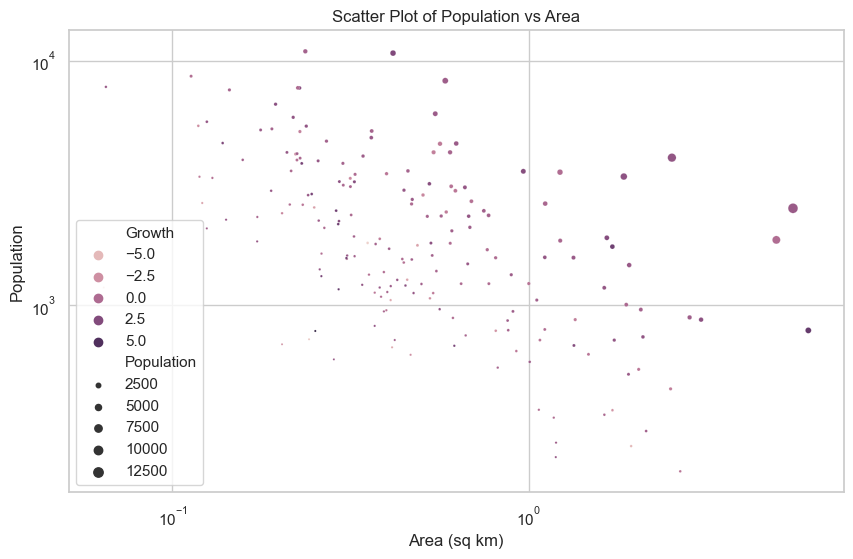

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the aesthetics for the plot
sns.set(style="whitegrid")

# Create the scatter plot
plt.figure(figsize=(10, 6))
ax = sns.scatterplot(data=data, x='Area', y='Density', hue='Growth', size='Population', sizes=(2, 50))
#set log log
ax.set(xscale='log', yscale='log')
# Adding titles and labels
ax.set_title('Scatter Plot of Population vs Area')
ax.set_xlabel('Area (sq km)')
ax.set_ylabel('Population')


c:\_NO_INSTALL\python\WPy64-31150\python-3.11.5.amd64\Lib\site-packages\seaborn\_oldcore.py:1124: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\_NO_INSTALL\python\WPy64-31150\python-3.11.5.amd64\Lib\site-packages\seaborn\_oldcore.py:1124: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


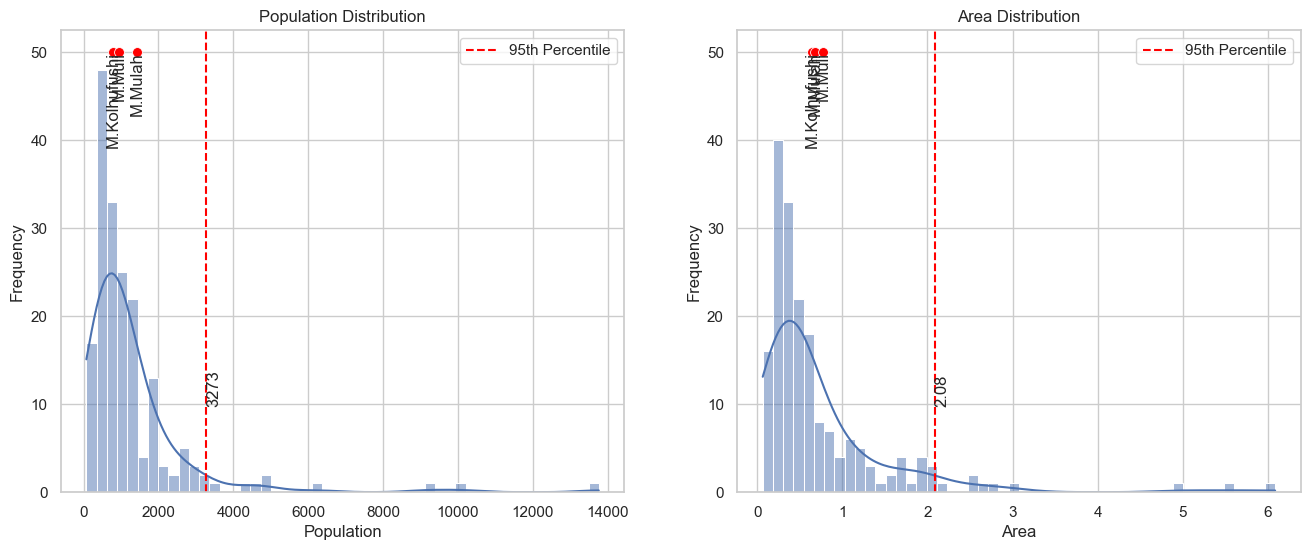

In [23]:
# Set up the figure with two subplots side by side
plt.figure(figsize=(16, 6))

subsetislands=['M.Kolhufushi', 'M.Muli', 'M.Mulah']
# select a subset that has Name in subsetislands
subset = data[data['Name'].isin(subsetislands)]

# First subplot for Population Distribution
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
sns.histplot(data['Population'], bins=50, kde=True)
plt.title('Population Distribution')
plt.xlabel('Population')
plt.ylabel('Frequency')
# log scale x-axis
#plt.xscale('log')
# draw ordinate to represent 95% percentile
plt.axvline(data['Population'].quantile(0.95), color='red', linestyle='--', label='95th Percentile')
plt.legend()
#label that value
plt.text(data['Population'].quantile(0.95), 10, f'{int(data["Population"].quantile(0.95))}', rotation=90)
# add points for the subset with points at the top of y-axis

sns.scatterplot(data=subset, x='Population', y=50, color='red', s=50)
# label the points with the island names, with rotated 90 text for better visibility. Also align the text to the right
for i in range(subset.shape[0]):
    plt.text(subset.iloc[i]['Population'], 50, subset.iloc[i]['Name'], rotation=90, va='top', ha='center') 
    # make sure the x axis has more ticks 1,2,3,...,10,20,30...,100,200,300,...,1000,2000,3000...
#plt.xticks([ 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 2000, 3000])
# Second subplot for Area Distribution
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
sns.histplot(data['Area'], bins=50, kde=True)
plt.title('Area Distribution')
plt.xlabel('Area')
plt.ylabel('Frequency')
# draw ordinate to represent 95% percentile
plt.axvline(data['Area'].quantile(0.95), color='red', linestyle='--', label='95th Percentile')
plt.legend()
#label that value
plt.text(data['Area'].quantile(0.95), 10, f'{int(data["Area"].quantile(0.95)*100)/100}', rotation=90)
# Show the plot
#plt.xscale('log')

sns.scatterplot(data=subset, x='Area', y=50, color='red', s=50)
# label the points with the island names, with rotated 90 text for better visibility. Also align the text to the right
for i in range(subset.shape[0]):
    plt.text(subset.iloc[i]['Area'], 50, subset.iloc[i]['Name'], rotation=90, va='top', ha='center') 

plt.show()


In [24]:
# ADD A NEW column population category based on population values: <500, 500-1000,1000-2000, 2000-10000, 10000-50000, >50000 to data
data['Population Category'] = pd.cut(data['Population'], bins=[0, 500, 1000, 2000, 10000, 50000, np.inf], labels=['<500', '500-1000', '1000-2000', '2000-10000', '10000-50000', '>50000'])

Name               Greater Male' Area
Population                     212138
Density                         18907
Area                            11.22
x                                   7
Namex         Greater Male' Area (11)
Name: 8, dtype: object
Name                Singapore
Population            6014723
Density                  8350
Area                    729.0
x                           7
Namex         Singapore (729)
Name: 7, dtype: object
Name                Bahrain
Population          1485510
Density                1910
Area                  778.0
x                         7
Namex         Bahrain (778)
Name: 6, dtype: object
Name                   Bangladesh
Population              172954319
Density                      1265
Area                     148460.0
x                               7
Namex         Bangladesh (148460)
Name: 3, dtype: object
Name                  Netherlands
Population               17618299
Density                       424
Area                      

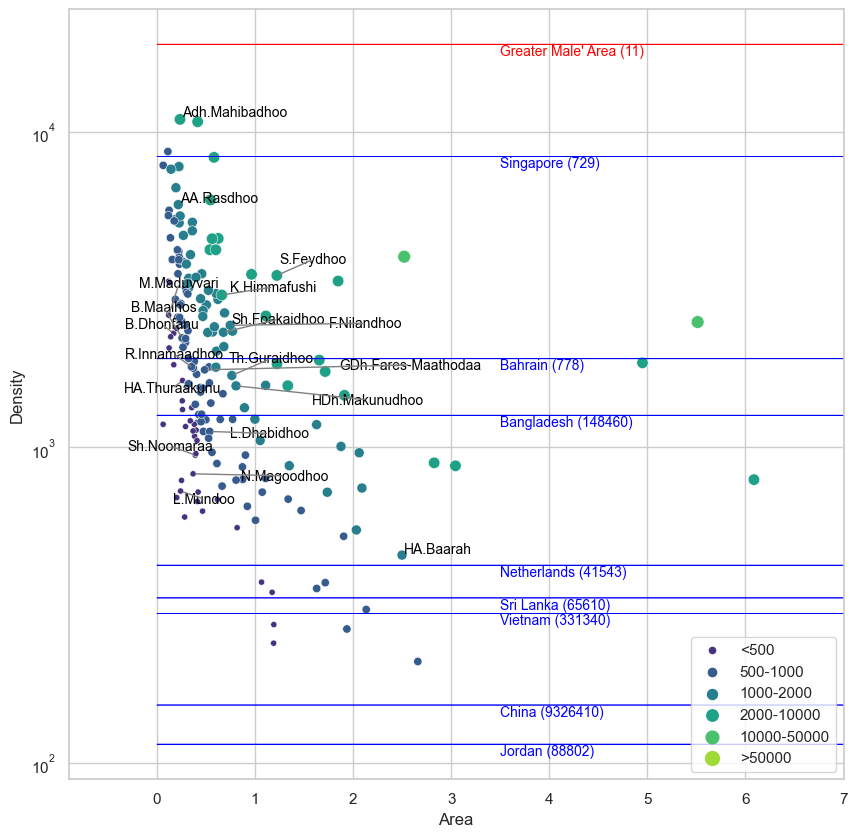

In [33]:
labellist1=['Canada', 'China', 'Congo (Democratic Republic)', 'South Africa', 'United States', 'Netherlands', 'Sri Lanka', 'India', 'Bangladesh',
            'Jordan', 'Vietnam', 'Japan', 'Tuvalu']
country_data = [
    ["China", 1428627663, 153, 9326410],
    ["Netherlands", 17618299, 424, 41543],
    ["Sri Lanka", 21893579, 334, 65610],
    #["India", 1428627663, 435, 2973190],
    ["Bangladesh", 172954319, 1265, 148460],
    ["Jordan", 10950000, 115, 88802],
    ["Vietnam", 98858950, 298, 331340],
    #["Japan", 123294513, 326, 377930],
    #["Tuvalu", 11396, 440, 26], 
    ["Bahrain", 1485510, 1910, 778],
    ["Singapore", 6014723, 8350, 729],
]

# add Male' population to the data Atol='K" Male', Population=212138, Area=11.22 km2, all others null
country_data.append(["Greater Male' Area",212138, 18907,  11.22])

## select countries with more than 100 per sq km
#country_data = [x for x in country_data if x[2] > 100]

# set plot size
plt.figure(figsize=(10, 10))

sns.scatterplot(data=data, x='Area', y='Density',  size='Population Category', sizes=(100, 20), hue='Population Category', palette='viridis'
)
# plot the country data
country_data = pd.DataFrame(country_data, columns=['Name', 'Population', 'Density', 'Area'])
# sort by decreasing density
country_data = country_data.sort_values(by='Density', ascending=False)
# create a new column 'x' with values uniformely distributed between 1 and 6
country_data['x'] = [7]*country_data.shape[0]
# new columns Namex to have name and area within brackets
country_data['Namex'] = country_data['Name'] + ' (' + country_data['Area'].astype(int).astype(str) + ')'
# new column 'Label' boolean to decide if the label should be displayed
# select top

#sns.scatterplot(data=country_data, x='x', y='Density', color='red', s=300, alpha=0.25)
# label those
for index, row in country_data.iterrows():
    print (row)
    # mark the point on y axis with the density
    #plt.scatter(0, row['Density'], color='red', s=10, alpha=0.25)
    # draw an arrow from that point to the point row['x], row['Density']
    x1=0
    x2=row['x']
    y=row['Density']
    # in plt
    color='blue'
    if row['Name']=="Greater Male' Area":
        color='red'
    plt.arrow(x1, y, x2-x1, 0, color=color, head_width=.1, head_length=0.1, lw=0.5)
    # in plt
    plt.text((x1+x2)/2.0*1., row['Density'], row['Namex'], rotation=0, va='top', ha='left', fontsize=10, color=color)
    
    
# add Name of each island to the plot
#plot only 1 in 10 islands
ct=0
TEXTS=[]
# Add labels to every 10th row using plt.text() and collect them for adjust_text()
for index, row in data.iterrows():
    if index % 10 == 0:  # For every 10th row
        txt = plt.text(row['Area'], row['Density'], row['Name'], fontsize=10, color='black')
        TEXTS.append(txt)  # Store the text objects in the list for adjust_text

# Apply log scale to y-axis
plt.yscale('log')

# Use adjust_text to ensure labels don't overlap and arrows are drawn
adjust_text(
    TEXTS,
    force_text=1.0,  # Force labels to move away from each other
    force_points=1.0,  # Force labels to repel from points
    arrowprops=dict(arrowstyle='-', color='gray', lw=1)  # Add arrows pointing back to the data points
)

# move legend to the bottom right
plt.legend(loc='lower right')
# set x range from -.9 to 7
plt.xlim(-.9, 7)
# save svg as Figure5.svg
plt.savefig('Figure5.svg')

In [26]:
# count the islands with each population category
data['Population Category'].value_counts()

Population Category
500-1000       73
1000-2000      49
<500           40
2000-10000     22
10000-50000     2
>50000          0
Name: count, dtype: int64